# Feature Engineering

# MCAR

In [1]:
### Missing completely at Random (MCAR)

import pandas as pd

In [2]:
df  = pd.read_csv('titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.isnull().sum() ### Age and cabin has some relationship

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df[df['Embarked'].isnull()] ### The 2 null values have no relationship => MCAR

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


## MNAR

In [10]:
### Missing not at random (MNAR)

df.isnull().sum() ### Age and cabin has some relationship

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
import numpy as np

In [14]:
df['cabin_null'] = np.where(df["Cabin"].isnull(),1,0)
df['cabin_null']

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    1
889    0
890    1
Name: cabin_null, Length: 891, dtype: int32

In [15]:
df["cabin_null"].mean()

0.7710437710437711

In [18]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

## Techinques to handle Missing data

### Mean Median Mode imputation

In [21]:
df = pd.read_csv('titanic_train.csv',usecols=['Age','Survived','Fare'])

In [22]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [24]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [29]:
def impute_nan(data, feature, median):
    df[feature+"_median"] = df[feature].fillna(median)

In [30]:
median = df.Age.median()
median

28.0

In [31]:
impute_nan(df,'Age',median)

In [32]:
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [33]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

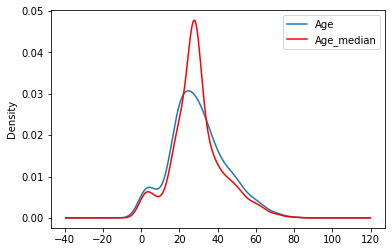

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df['Age_median'].plot(kind='kde',ax=ax,color='red')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

## Random sample Imputation

In [17]:
import pandas as pd
df = pd.read_csv('titanic_train.csv',usecols=['Age','Survived','Fare']) 
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [3]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [22]:
### Random sampling

df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [24]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [26]:
df["Age_random"] = df["Age"]
df.loc[df['Age'].isnull(),"Age_random"]

5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
       ..
859   NaN
863   NaN
868   NaN
878   NaN
888   NaN
Name: Age_random, Length: 177, dtype: float64

In [27]:
def impute_nan(data, feature, median):
    df[feature+"_median"] = df[feature].fillna(median)
    df[feature+"_random"] = df[feature]
    ### random sample to replace nan
    random_sample = df[feature].dropna().sample(df[feature].isnull().sum(),random_state=0)
    ### Extracting index of nan values and assign to random sample
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(),feature+"_random"] = random_sample

In [28]:
median = df.Age.median()

In [29]:
impute_nan(df,"Age",median)

In [30]:
df

,Survived,Age,Fare,Age_random,Age_median
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,NaN,23.4500,15.0,28.0
889,1,26.0,30.0000,26.0,26.0


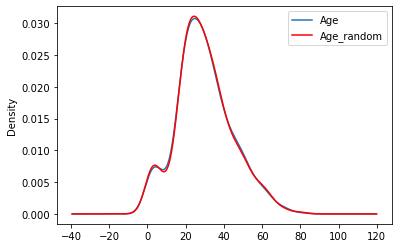

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df['Age_random'].plot(kind='kde',ax=ax,color='red')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

## Capturing Nan values with a new feature

In [1]:
import pandas as pd
df = pd.read_csv('titanic_train.csv',usecols=['Age','Survived','Fare']) 
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [2]:
import numpy as np
df["Age_nan"] = np.where(df["Age"].isnull(),1,0)

In [3]:
df.head()

,Survived,Age,Fare,Age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [4]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [5]:
df.head(20) ## We can see where Age_nan is 1 the value of Age is replaced with median

,Survived,Age,Fare,Age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


## End of Distribution Imputation

In [35]:
import pandas as pd
df = pd.read_csv('titanic_train.csv',usecols=['Age','Survived','Fare']) 
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

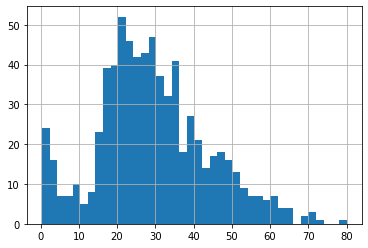

In [36]:
df.Age.hist(bins=40)

In [37]:
### End of distribution - More than 3rd Std Devitation
extreme = df.Age.mean()+3*df.Age.std()

In [38]:
def impute_nan(df,feature,median,extreme):
    df[feature+"_end_distribution"] = df[feature].fillna(extreme)
    df[feature].fillna(median,inplace=True)

In [39]:
impute_nan(df,"Age",28,extreme=extreme)
df.head(20)

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


<AxesSubplot:>

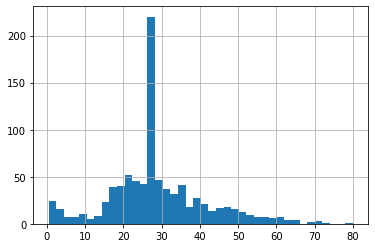

In [41]:
df.Age.hist(bins=40) ### Large distortion In variance

<AxesSubplot:>

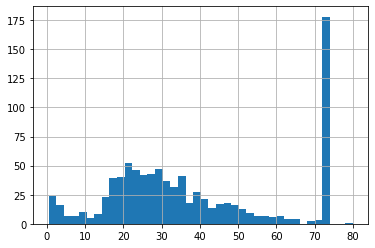

In [42]:
df.Age_end_distribution.hist(bins=40)

D:\SD\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

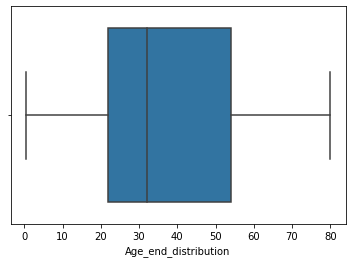

In [43]:
import seaborn as sns
sns.boxplot("Age_end_distribution",data=df)

## Arbitrary Value Imputation

In [1]:
import pandas as pd
df = pd.read_csv('titanic_train.csv',usecols=['Age','Survived','Fare']) 
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
def impute_nan(df,feature):
    df[feature+"_hundred"] = df[feature].fillna(100)

In [4]:
impute_nan(df,"Age")
df.head(10)

,Survived,Age,Fare,Age_hundred
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
5,0,NaN,8.4583,100.0
6,0,54.0,51.8625,54.0
7,0,2.0,21.0750,2.0
8,1,27.0,11.1333,27.0
9,1,14.0,30.0708,14.0
